# Part I - (Dataset Exploration 'Ford GoBike System Data')

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
<a id='intro'></a>

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
<a id='wrangling'></a>
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(fordgobike.shape)
fordgobike.head(10)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
fordgobike.shape

(183412, 16)

In [4]:
fordgobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
fordgobike.isna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### What is the structure of your dataset?

Our dataset 'fordgobike' contain 183412 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

The feature of interest is to have more clients.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that can help me is to understand our clients by studying clients and their rides.

<a id='univariate'></a>
## Univariate Exploration

Number of clients by gender

<AxesSubplot:xlabel='member_gender', ylabel='count'>

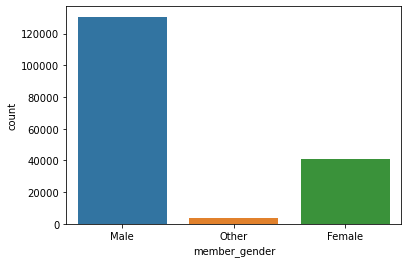

In [6]:
sb.countplot(data=fordgobike, x='member_gender')

Number of rides by bike share for all trip option

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='count'>

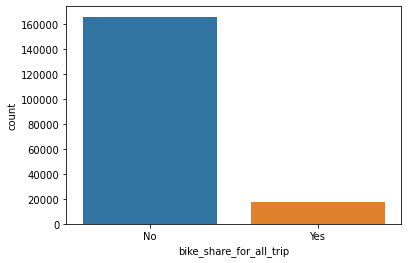

In [7]:
sb.countplot(data=fordgobike, x='bike_share_for_all_trip')

Number of clients by user type

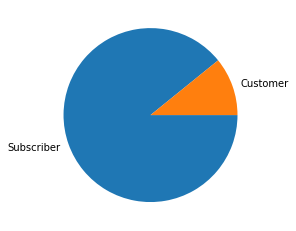

In [8]:
sorted_counts = fordgobike['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, counterclock = False);

Number of clients by birth year

(array([1.0000e+00, 7.0000e+01, 1.0000e+00, 4.0000e+00, 1.2700e+02,
        8.2900e+02, 8.0460e+03, 2.2273e+04, 6.9441e+04, 7.4355e+04]),
 array([1878. , 1890.3, 1902.6, 1914.9, 1927.2, 1939.5, 1951.8, 1964.1,
        1976.4, 1988.7, 2001. ]),
 <BarContainer object of 10 artists>)

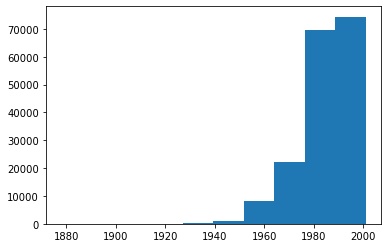

In [9]:
plt.hist(data=fordgobike, x='member_birth_year')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I'think that the interst variable on dataset is to say the different metrics for our clients : Gender,Type,birth year and the ride duration for different customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1 : For first and second Graph Bars have a different color so it's better to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color.

2 : The asthetic of our pie chart is not perfect we need to start from the top of circle and also it's preferable to diplay the exact percentage inside portion.

3 : We have to adjust bins to really understand the distribution of the data.

### 1

Text(0.5, 1.0, 'Number of clients by gender')

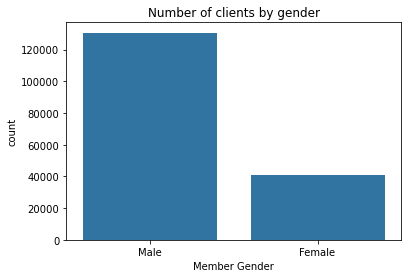

In [10]:
base_color = sb.color_palette()[0]
sb.countplot(data=fordgobike, x='member_gender', color=base_color,order=['Male','Female'])
plt.xlabel('Member Gender')
plt.title('Number of clients by gender')

Text(0.5, 1.0, "Number of rides by 'bike share for all trip' option")

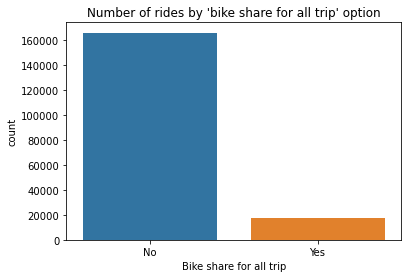

In [11]:
base_color = sb.color_palette()[0]
sb.countplot(data=fordgobike, x='bike_share_for_all_trip')
plt.xlabel('Bike share for all trip')
plt.title('Number of rides by \'bike share for all trip\' option')

### 2

Text(0.5, 1.0, 'Number of clients by user type')

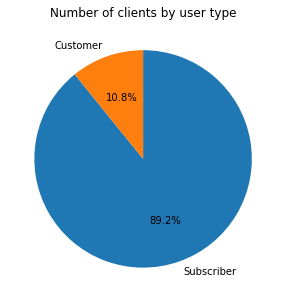

In [12]:
sorted_counts = fordgobike['user_type'].value_counts()
plt.figure(figsize = [200, 5])
plt.pie(sorted_counts, labels = sorted_counts.index  , autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('Number of clients by user type')

### 3

Text(0.5, 1.0, 'Number of clients by birth year')

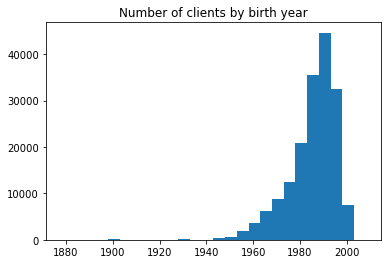

In [13]:
bins = np.arange(1878, fordgobike['member_birth_year'].max()+10, 5)
plt.hist(fordgobike['member_birth_year'], bins = bins)
plt.title('Number of clients by birth year')

<a id='bivariate'></a>
## Bivariate Exploration

In [14]:
def Haversine(lat1,lon1,lat2,lon2):
    R = 6371.0088
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
    return round(d,4)
fordgobike['distance'] = Haversine(fordgobike['start_station_latitude'],fordgobike['start_station_longitude'],fordgobike['end_station_latitude'],fordgobike['end_station_longitude'])

In [15]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.5447
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.7430
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.7045
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.2607
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.4093


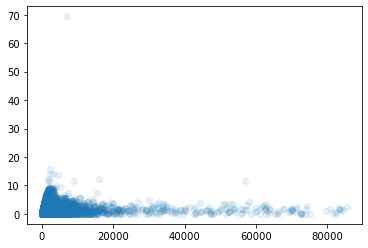

In [16]:
base_color = sb.color_palette()[0]
plt.scatter(data = fordgobike, x = 'duration_sec', y = 'distance'  , alpha=1/10);

Number of clients by user type and gender

Text(0.5, 1.0, 'Number of clients by user type and gender')

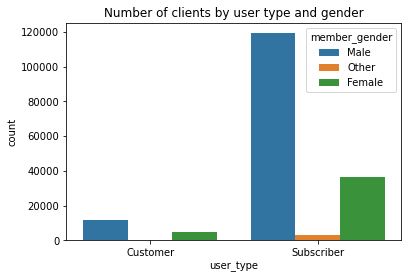

In [17]:
sb.countplot(data = fordgobike, x = 'user_type', hue = 'member_gender')
plt.title('Number of clients by user type and gender')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We see the majority of clients are male and subscribers and most rides have a duration less than 20000 sec and a distance less than 10 km

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes we need to see also the relashionship between distance and duration by birth year and gender.

<a id='multivariate'></a>
## Multivariate Exploration


Text(0.5, 1.0, 'Ride duration by user type and birth year')

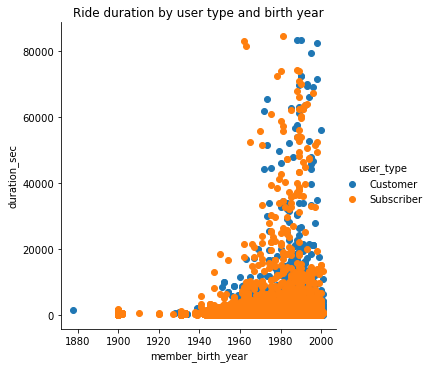

In [18]:
g = sb.FacetGrid(data = fordgobike, hue = 'user_type',height=5 )
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend()
plt.title('Ride duration by user type and birth year')

Text(0.5, 1.0, 'Ride duration by gender and birth year')

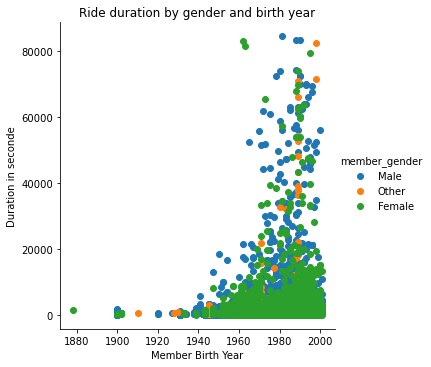

In [19]:
g = sb.FacetGrid(data = fordgobike, hue = 'member_gender',height=5)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend()
plt.xlabel('Member Birth Year')
plt.ylabel('Duration in seconde')
plt.title('Ride duration by gender and birth year')

Text(0.5, 1.0, 'Ride distance by gender and birth year')

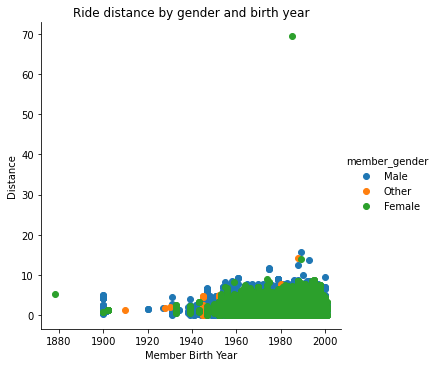

In [20]:
g = sb.FacetGrid(data = fordgobike, hue = 'member_gender',height=5)
g.map(plt.scatter, 'member_birth_year', 'distance')
g.add_legend()
plt.xlabel('Member Birth Year')
plt.ylabel('Distance')
plt.title('Ride distance by gender and birth year')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The majority of rides taken by clients have a birth year between 1960 and 2000 with a distance under 10 and duration under 10000 seconds.

### Were there any interesting or surprising interactions between features?

I'm surprising from the number of rides and time and distance taken by femal because in the first graph we see a huge different on number of clients between male and female.

<a id='conclusions'></a>
## Conclusions
After load the dataset and explore some charateristics of our dataset we start by ploting different graphs to see relationships between different variables and we conclude that the most client are male and the majority of rides are with distance less than 10 km and duration under 10000 sec. 